In [2]:
%pip install pyod
import os
import numpy as np
from pyod.models import hbos
from pyod.utils.data import evaluate_print
from sklearn.metrics import confusion_matrix,cohen_kappa_score,f1_score
from scipy import signal
import matplotlib.pyplot as plt
import pickle
import pandas as pd

Note: you may need to restart the kernel to use updated packages.


In [3]:
#####
# Trial or epoch = eeg segment
#####

channels = 32
seconds = 0.5    # Size of each segment we want
fs = 256.0         # Dtaset eeg sampling rate
data_portion = 1
save_model = False

In [4]:
df = pd.read_csv(r'/Data/TrainData/features_raw.csv')
df.head()

,Fp1,AF3,F3,F7,FC5,FC1,C3,T7,CP5,CP1,...,Cz,C4,T8,CP6,CP2,P4,P8,PO4,O2,Unnamed: 32
0,0.057813,-1.335266,4.640480,0.219573,7.473817,2.314842,1.918097,-9.257533,9.089943,-7.104519,...,-2.241480,1.415335,2.406646,12.864059,4.021099,-2.828598,-2.588735,2.637905,-5.226618,NaN
1,1.367408,10.259654,3.345409,7.897852,-2.446051,-1.655035,-6.301423,-7.290317,-3.546453,-5.705187,...,-2.568397,-5.651418,-0.096730,-4.930759,-1.722504,-6.111309,0.094893,-3.521353,1.887093,NaN
2,-1.783132,4.133553,-0.951680,-1.624803,-1.827309,-2.280364,-2.279225,9.151344,-0.239575,-0.057604,...,-2.132823,-0.521117,8.605298,-4.499946,-3.232839,-4.249645,-3.687167,-7.383004,-4.489537,NaN
3,-3.690217,-0.814000,2.295469,0.901445,8.323679,1.127906,6.356886,11.642082,9.354154,-1.662478,...,-0.506117,-1.154866,-3.940251,7.390881,2.129897,-0.794675,-1.959021,2.774530,-6.323060,NaN
4,2.137114,6.420466,6.122230,10.015321,3.106394,3.183129,3.658535,4.571793,4.917712,-2.325940,...,1.813907,-6.444635,-27.680880,0.641364,1.996658,-0.445779,2.614021,6.161845,3.308816,NaN


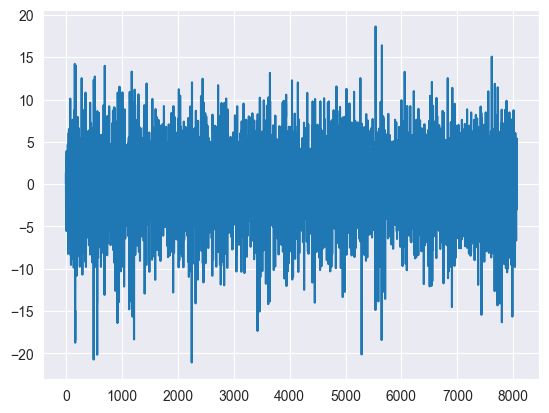

In [5]:
plt.plot(df['Fp1'])

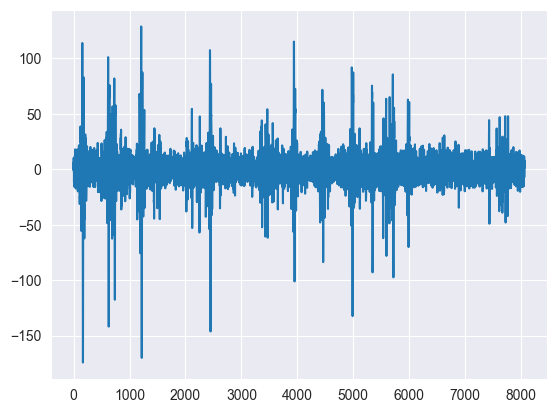

In [6]:
plt.plot(df['AF3'])

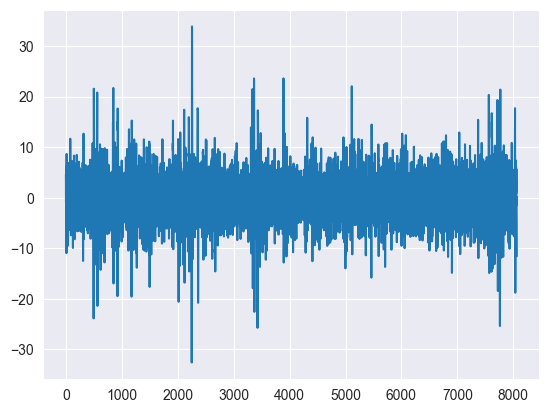

In [7]:
plt.plot(df['F3'])

In [8]:
class EEGDataset2:
    def __init__(self, train_csv, seconds=0.500, fs=256, data_portion=1, normalize=True, isolated_channels=False):
        assert data_portion > 0.0 and data_portion <= 1, 'data_portion should be > 0 and <= 1'
        
        self.isolated_channels = isolated_channels
        self.normalize = normalize
        self.train_csv = train_csv
        self.seconds = seconds
        self.fs = fs
        self.data_portion = data_portion
    
    def get_data(self):
        df = pd.read_csv(self.train_csv)
        array_size = int(self.seconds * self.fs)
        # Dataset shape is: [data x channels]
        # we want shape: [segments x features]
        
        if self.normalize:
            df = (df - df.mean()) / df.std()
        
        if self.isolated_channels:
            channels = []
            for channel in df.columns[0:32]:
                isolated_channel = []
                for i in range(int(len(df) / array_size)):
                    isolated_channel.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                channels.append(np.array(isolated_channel))
            return np.array(channels)
            
        dataset = []
        
        for channel in df.columns[0:32]:
            for i in range(int(len(df) / array_size)):
                dataset.append(df[channel][i*array_size:(i+1)*array_size].to_numpy())
                
        return np.array(dataset)

In [9]:
train_csv = r'D:\Python_Projekty\Project_Emotions\Data\features_raw.csv'
eegDataset = EEGDataset2(train_csv, seconds, fs, data_portion, normalize=True)

train_dataset = eegDataset.get_data()

In [10]:
train_dataset.shape

(2016, 128)

In [11]:
clf = hbos.HBOS(n_bins=17, alpha=0.07, tol=0.5,contamination=.15)
clf.fit(train_dataset)

print("="*20)
print("TRAINING THE MODEL")

TRAINING THE MODEL


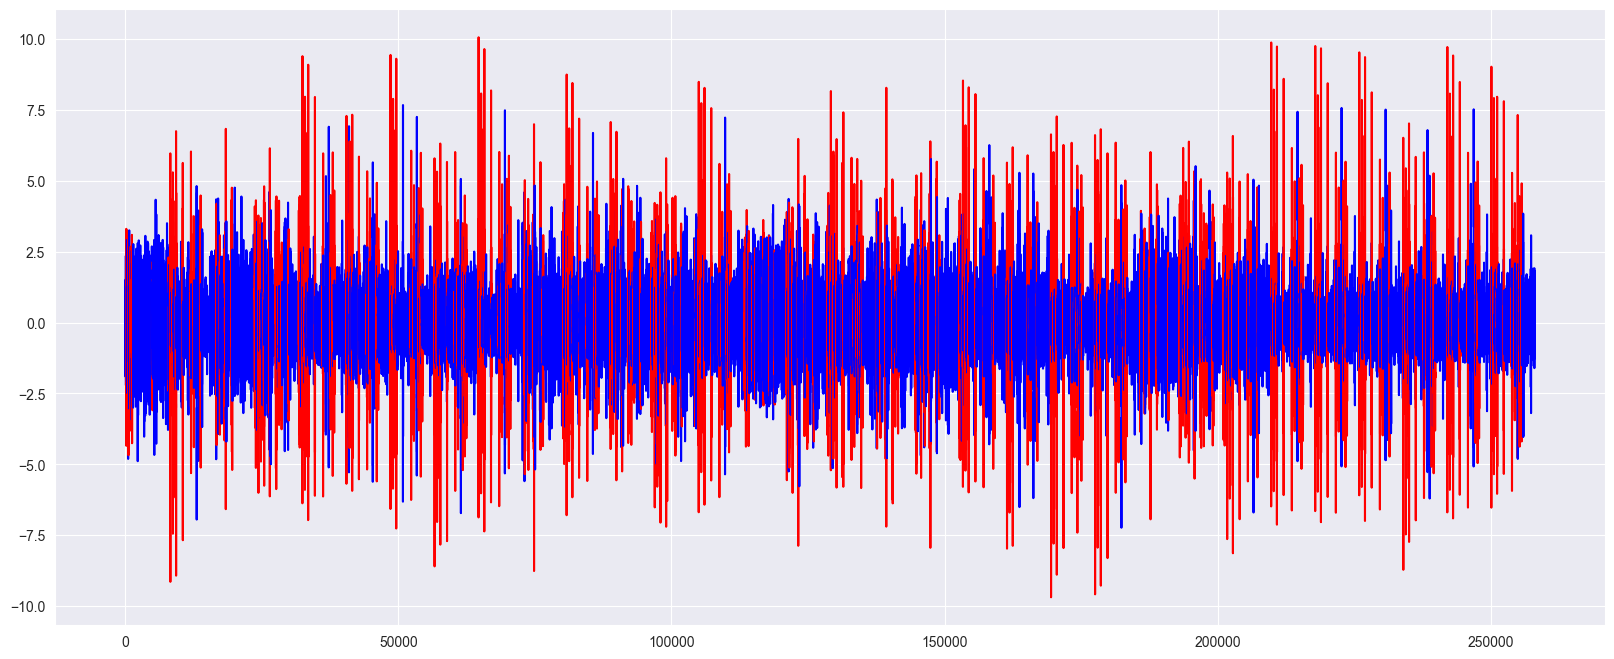

In [12]:
pred = clf.predict(train_dataset)

for i in range(len(pred)):    
    plt.rcParams["figure.figsize"] = (20,8)
    
    if pred[i] == 1: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='red')
    else: plt.plot(range(128*i,128*(i+1)), train_dataset[i], color='b')

In [39]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load
#importing Libraries 
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import tensorflow 
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import tensorflow as tf
tf.compat.v1.reset_default_graph()
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Sequential
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM
tf.keras.backend.clear_session()
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn import datasets, tree, linear_model, svm
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix

import seaborn as sns
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('Data/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

Data/emotions.csv
Data/features_raw.csv
Data/new_sample_negative.csv
Data/new_sample_neutral.csv
Data/new_sample_positive.csv


In [14]:
'''This is a dataset of EEG brainwave data that has been processed with original strategy of statistical extraction 
    the data set consist brain signal of one male and one feamle by showing them different scenes (like Emotional,Funny,Death,Nature scenes) 
    and took their brain signal in these particular environments'''

#Reading dataset
data = pd.read_csv("Data/TrainData/emotions.csv")

In [15]:
#chceking length of dataset
len(data)

2132

In [16]:
#Seprarting Positive,Neagtive and Neutral dataframes for plortting
pos = data.loc[data["label"]=="POSITIVE"]
sample_pos = pos.loc[2, 'fft_0_b':'fft_749_b']
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, 'fft_0_b':'fft_749_b']
neu = data.loc[data["label"]=="NEUTRAL"]
sample_neu = neu.loc[1, 'fft_0_b':'fft_749_b']

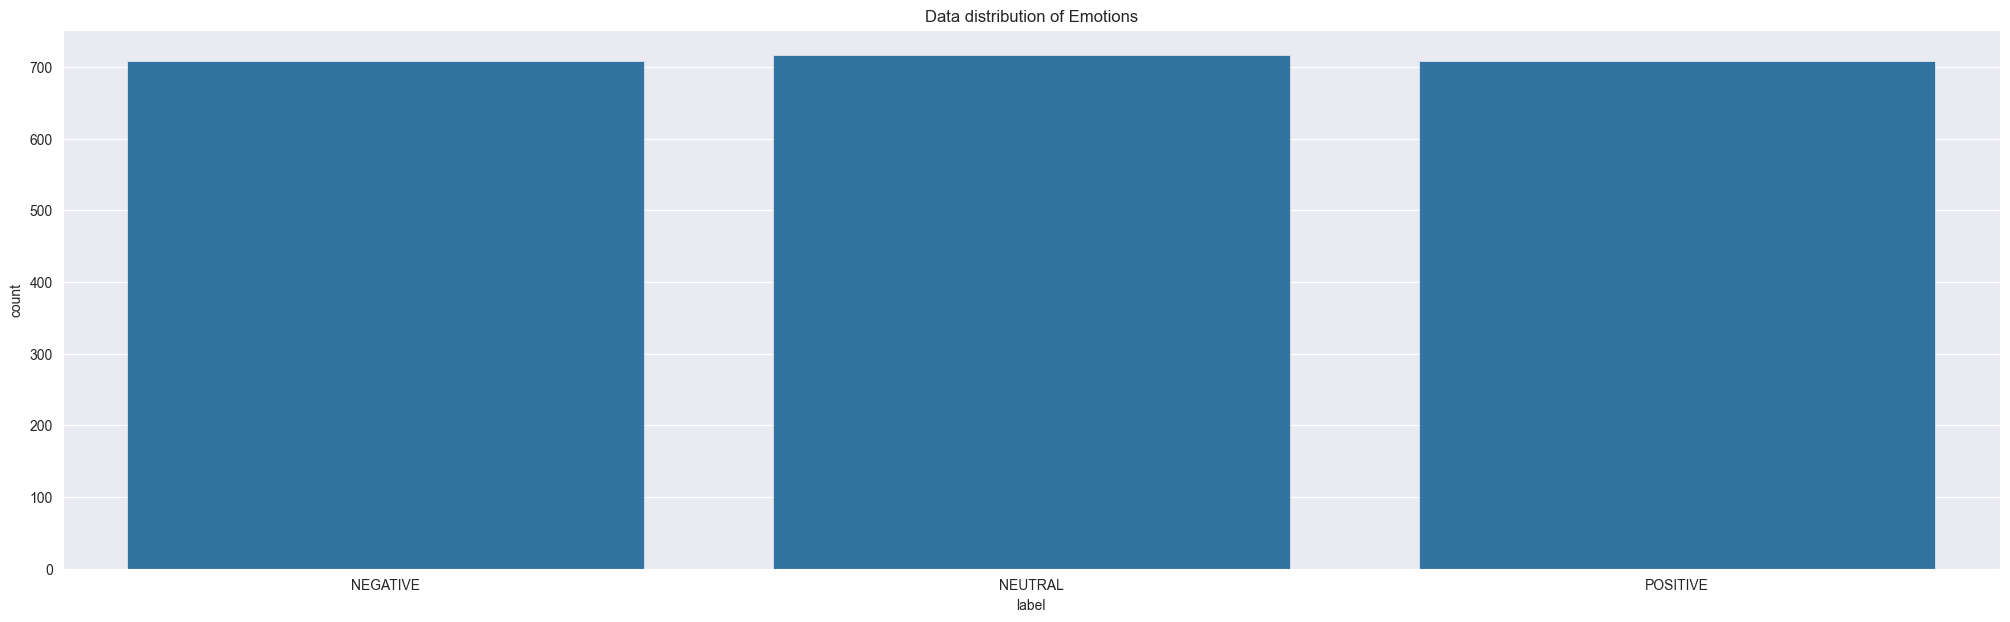

In [17]:
#plottintg Dataframe distribution
plt.figure(figsize=(25,7))
plt.title("Data distribution of Emotions")
plt.style.use('fivethirtyeight')
sns.countplot(x='label', data=data)
plt.show()

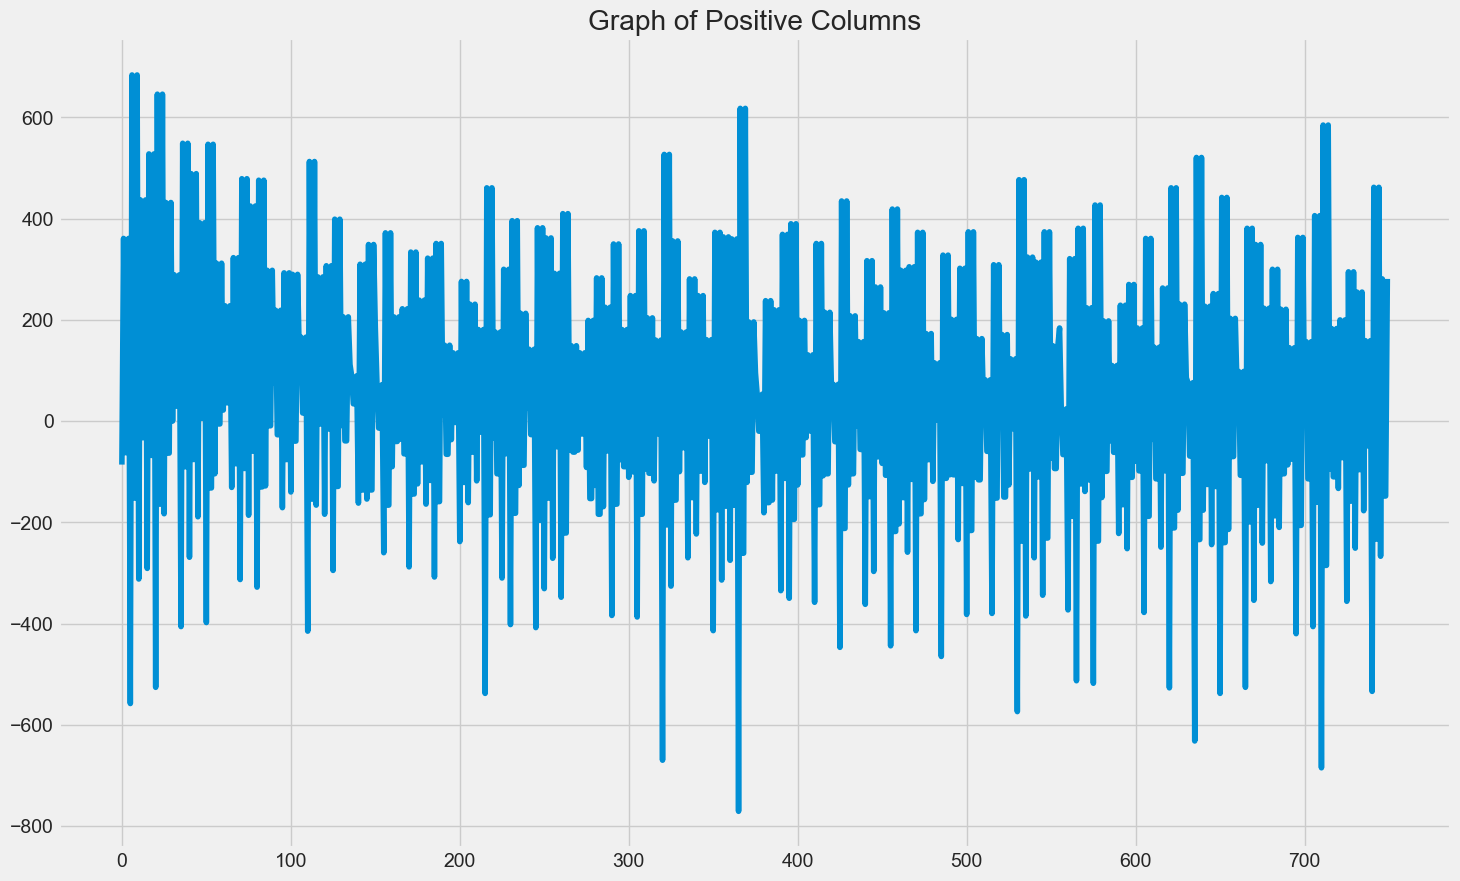

'As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'

In [18]:
#Plotting Positive DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_pos)), sample_pos)
plt.title("Graph of Positive Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from greater than 600 to and less than than -600'''

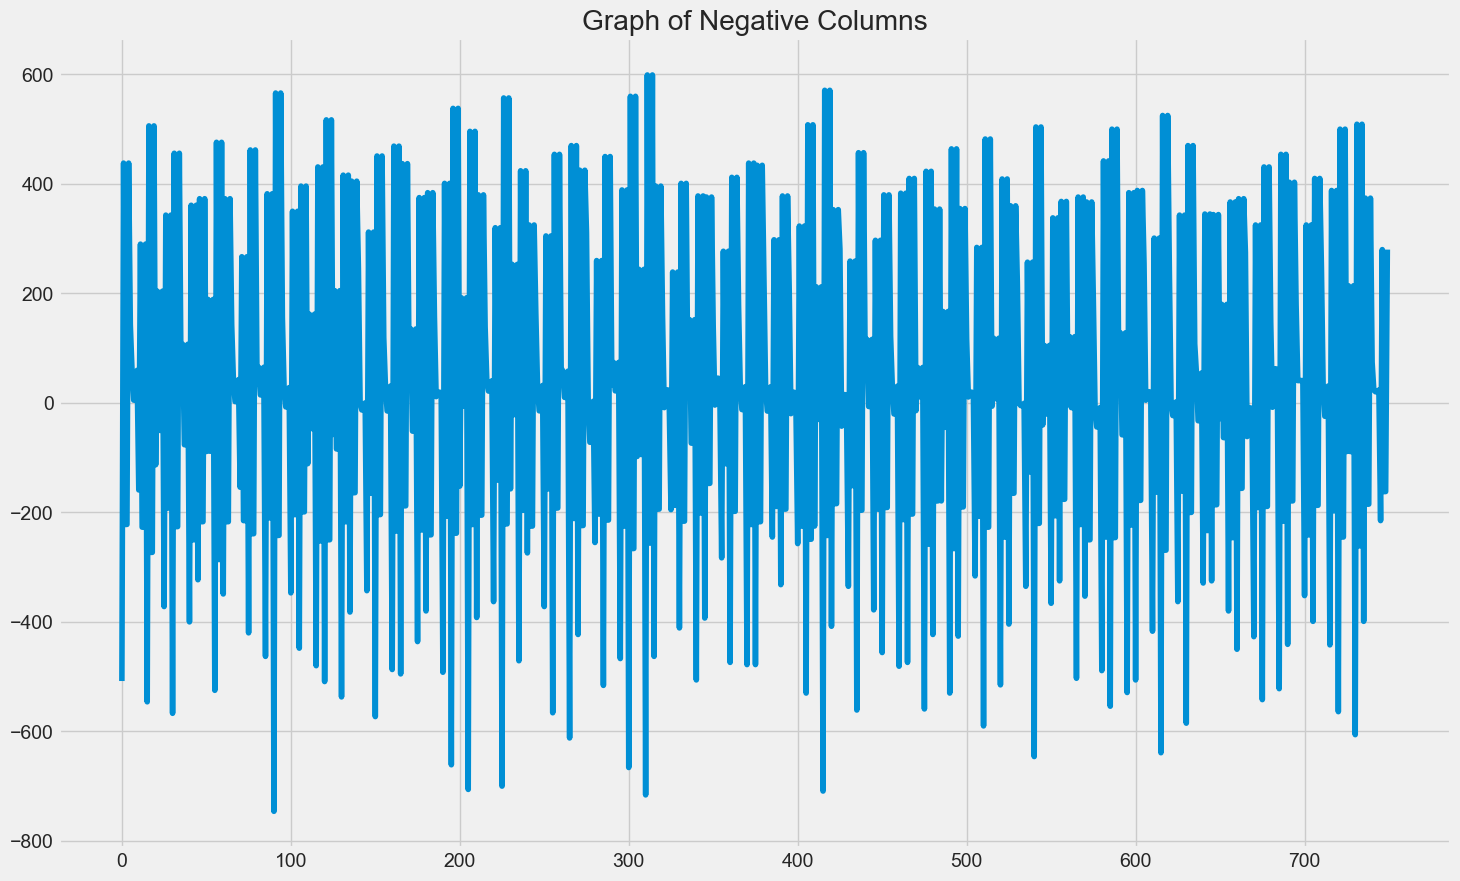

'As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'

In [19]:
#Plotting Negative DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neg)), sample_neg)
plt.title("Graph of Negative Columns")
plt.show()
'''As we can noticed the most of the Negative Signals are from less than 600 to and greater than -600'''

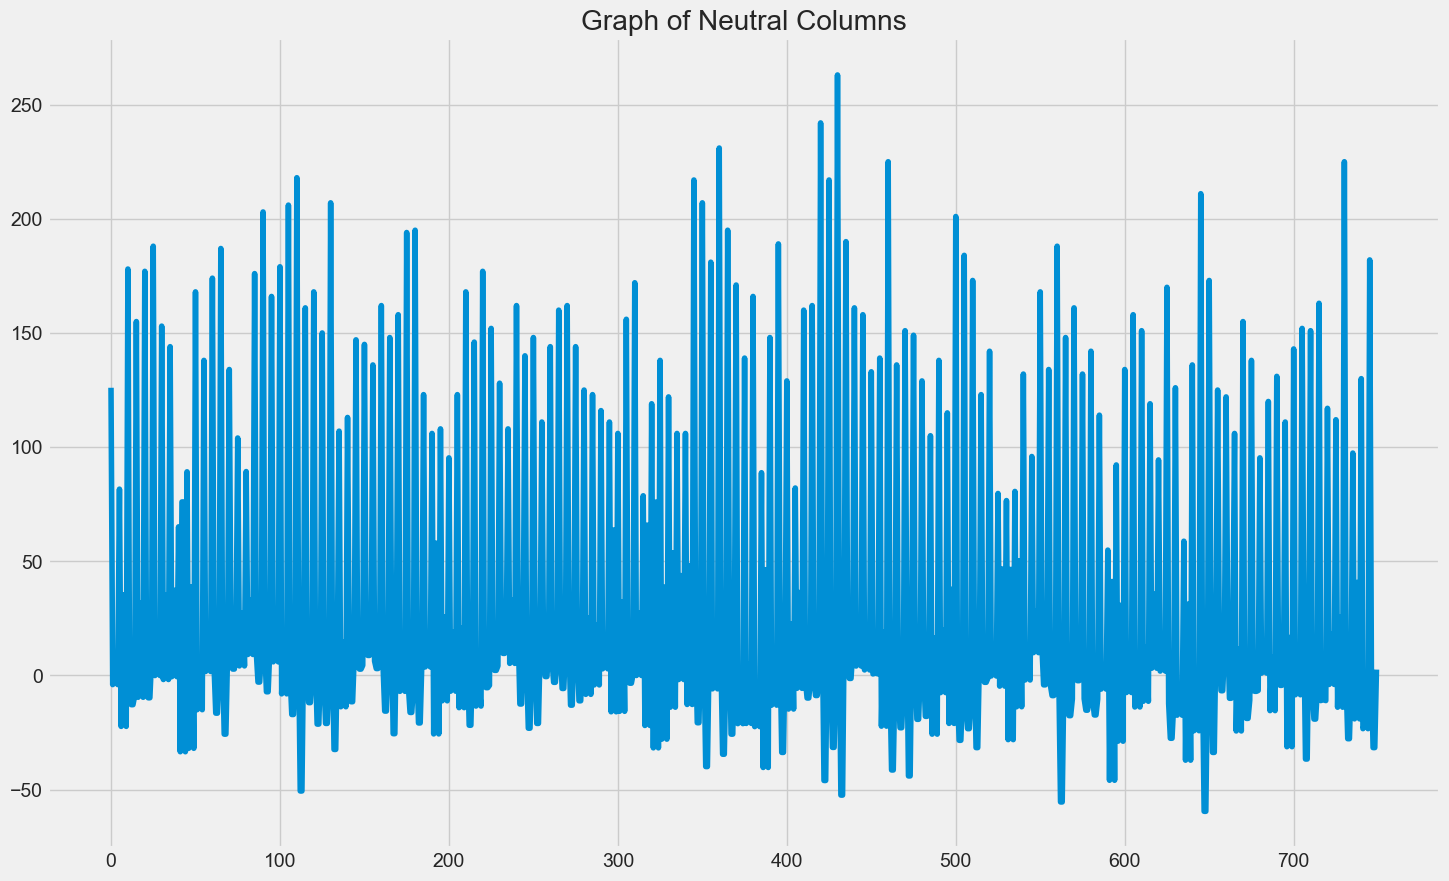

'As we can see the most of the Neutral Signals ae in between -50 to 250 '

In [20]:
#Plotting Neutral DataFrame
plt.figure(figsize=(16, 10))
plt.plot(range(len(sample_neu)), sample_neu)
plt.title("Graph of Neutral Columns")
plt.show()
'''As we can see the most of the Neutral Signals ae in between -50 to 250 '''

In [21]:
def Transform_data(data):
    pd.set_option('future.no_silent_downcasting', True)
    #Encoding Lables into numbers
    encoding_data = ({'NEUTRAL': 0, 'POSITIVE': 1, 'NEGATIVE': 2} )
    data_encoded = data.replace(encoding_data)
    #getting brain signals into x variable
    x=data_encoded.drop(["label"]  ,axis=1)
    #getting labels into y variable
    y = data_encoded.loc[:,'label'].values
    scaler = StandardScaler()
    #scaling Brain Signals
    scaler.fit(x)
    X = scaler.transform(x)
    #One hot encoding Labels 
    Y = to_categorical(y)
    return X,Y, scaler

In [22]:
#Calling above function and splitting dataset into train and test
X,Y, scaler = Transform_data(data)
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 4)

In [23]:
#checking shape of dataset
x_train.shape[1]

2548

In [24]:
def create_model():
    inputs = tf.keras.Input(shape=(x_train.shape[1],))
    # Zmiana kształtu z (liczba_cech,) na (liczba_cech, 1)
    reshaped = tf.keras.layers.Reshape((x_train.shape[1], 1))(inputs)

    gru = tf.keras.layers.GRU(256, return_sequences=True)(reshaped)
    flatten = tf.keras.layers.Flatten()(gru)
    outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

    model = tf.keras.Model(inputs=inputs, outputs=outputs)
    model.summary()
    return model


In [25]:
#cretaing model
lstmmodel = create_model()
#Compiling model 
lstmmodel.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 2548)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ reshape (Reshape)               │ (None, 2548, 1)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ gru (GRU)                       │ (None, 2548, 256)      │       198,912 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 652288)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3)              │     1,956,867 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,155,779 (8.22 MB)

 Trainable params: 2,155,779 (8.22 MB)

 Non-trainable params: 0 (0.00 B)

In [26]:
#Training and Evaluting model
history = lstmmodel.fit(x_train, y_train, epochs = 10, validation_split=0.1)
loss, acc = lstmmodel.evaluate(x_test, y_test)

Epoch 1/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 232s 5s/step - accuracy: 0.8226 - loss: 0.9115 - val_accuracy: 0.9123 - val_loss: 0.4034
Epoch 2/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 220s 5s/step - accuracy: 0.9313 - loss: 0.1919 - val_accuracy: 0.8947 - val_loss: 0.3054
Epoch 3/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 218s 5s/step - accuracy: 0.9334 - loss: 0.1700 - val_accuracy: 0.9181 - val_loss: 0.2274
Epoch 4/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 218s 5s/step - accuracy: 0.9666 - loss: 0.0882 - val_accuracy: 0.9532 - val_loss: 0.1560
Epoch 5/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.9767 - loss: 0.0747 - val_accuracy: 0.9181 - val_loss: 0.2514
Epoch 6/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 221s 5s/step - accuracy: 0.9836 - loss: 0.0523 - val_accuracy: 0.9532 - val_loss: 0.1540
Epoch 7/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 213s 4s/step - accuracy: 0.9909 - loss: 0.0346 - val_accuracy: 0.9298 - val_loss: 0.1742
Epoch 8/10
48/48 ━━━━━━━━━━━━━━━━━━━━ 209s 4s/step - accuracy: 0.9976 - loss: 0.0128 - val_accuracy: 0.9591 - v

In [27]:
#Loss and Accuracy of model on Testiong Dataset 
print(f"Loss on testing: {loss*100}",f"\nAccuracy on Training: {acc*100}")

Loss on testing: 11.919363588094711 
Accuracy on Training: 96.48711681365967


In [28]:
#predicting model on test set for plotting Confusion Matrix
pred  = lstmmodel.predict(x_test)

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 838ms/step


In [29]:
#Creation of Function of Confusion Matrix
def plot_confusion_matrix(cm, names, title='Confusion matrix', cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(data.label.unique()))
    plt.xticks(tick_marks, names, rotation=90)
    plt.yticks(tick_marks, names)
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [30]:
#after getting prediction checking maximum score prediction to claim which emotion this brain signal belongs to
pred1 = np.argmax(pred,axis=1)

In [31]:
#inversing the one hot encoding
y_test1 =   np.argmax(y_test,axis=1)

In [32]:
#printing first 10 Actual and predicted outputs of Test brain signals
print("Predicted:  ",pred1[:10])
print("\n")
print("Actual: ",y_test1[:10])


Predicted:   [1 1 1 2 1 1 2 1 2 1]


Actual:  [1 1 1 2 1 1 2 1 2 1]


Confusion matrix, without normalization
[[150   3   0]
 [  3 131   8]
 [  0   1 131]]


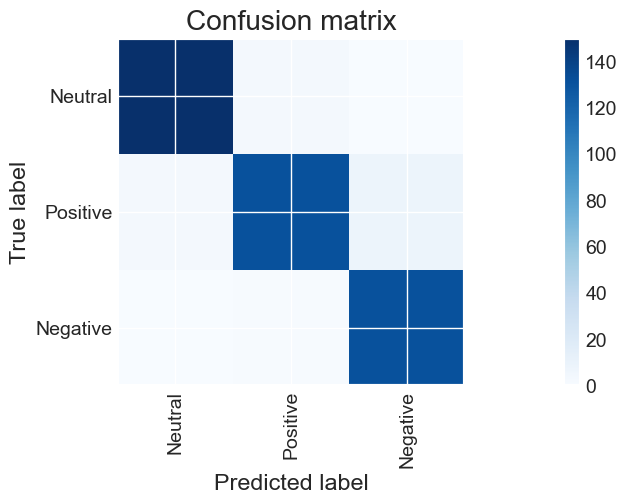

In [33]:
#Plotting Confusion matrix of Lstm Model
cm = confusion_matrix(y_test1, pred1)
np.set_printoptions(precision=2)
print('Confusion matrix, without normalization')
print(cm)
plt.rcParams["figure.figsize"]=(20,5)
plt.figure()
plot_confusion_matrix(cm,["Neutral","Positive","Negative"])

In [34]:
names1 = ["Neutral","Positive","Negative"]


*		Classification Report GNB:
               precision    recall  f1-score   support

           0       0.65      0.97      0.78       153
           1       0.46      0.30      0.36       142
           2       0.81      0.66      0.73       132

    accuracy                           0.65       427
   macro avg       0.64      0.64      0.62       427
weighted avg       0.64      0.65      0.62       427


*		Classification Report SVM:
               precision    recall  f1-score   support

           0       0.95      0.99      0.97       153
           1       0.98      0.89      0.94       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.96      0.96       427
weighted avg       0.96      0.96      0.96       427


*		Classification Report LR:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98       153
           1       0.98      0.94 

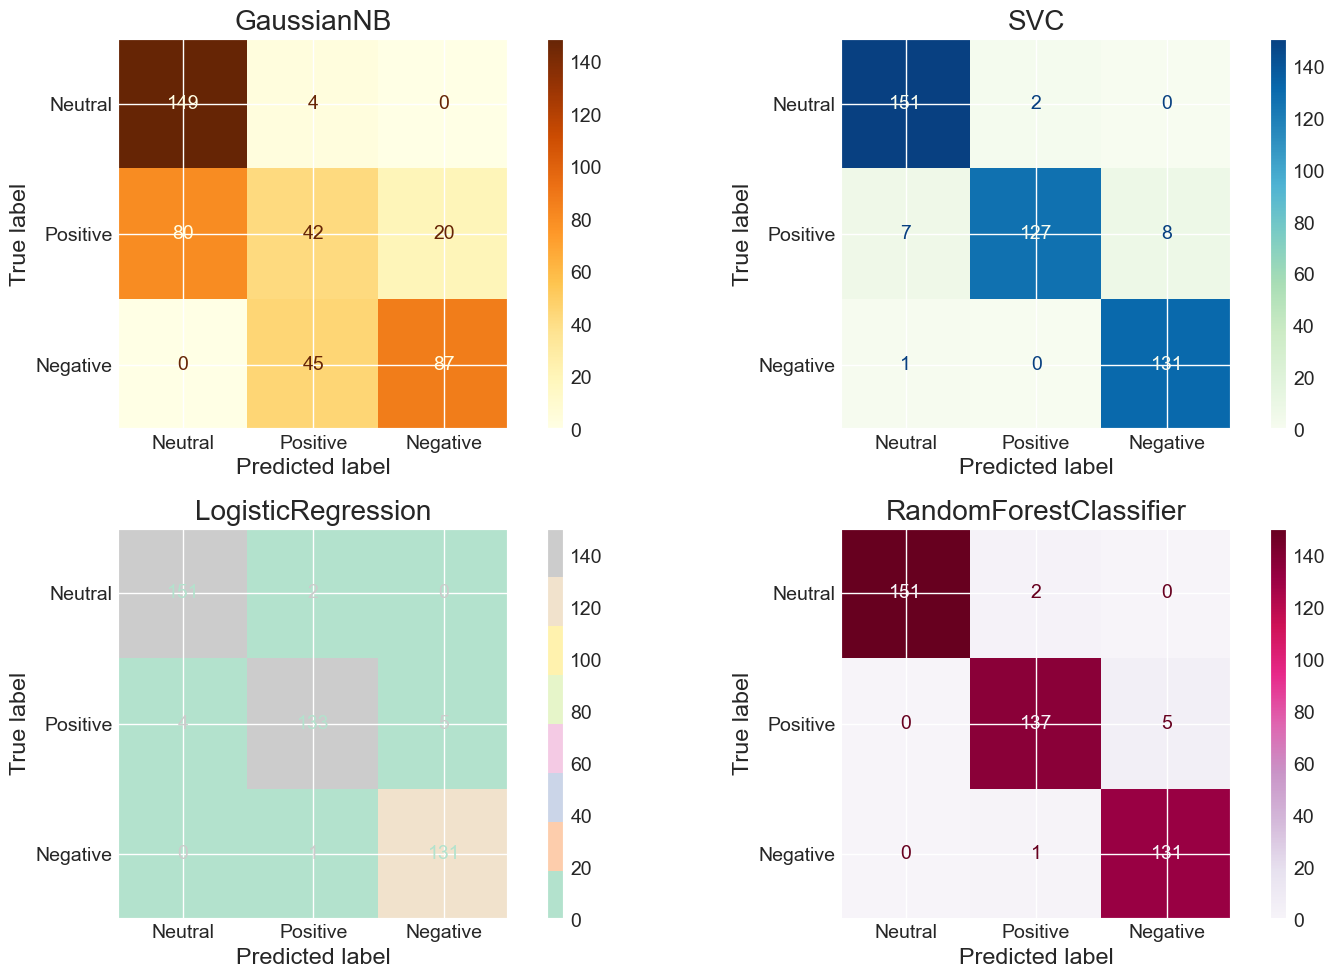

In [35]:
#Training our dataset on different Classifiers to check the results and creating their classification reports
#NAves Bayes Clssifier
Classifier_gnb = GaussianNB().fit(x_train, np.argmax(y_train,axis=1))
pred_gnb = Classifier_gnb.predict(x_test)
print ('\n*\t\tClassification Report GNB:\n', classification_report(np.argmax(y_test,axis=1), pred_gnb))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_gnb)
### Support Vector Machine

Classifier_svm = svm.SVC(kernel='linear').fit(x_train, np.argmax(y_train,axis=1))
pred_svm = Classifier_svm.predict(x_test)
print ('\n*\t\tClassification Report SVM:\n', classification_report(np.argmax(y_test,axis=1), pred_svm))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_svm)
### Logistic Regression

Classifier_LR = linear_model.LogisticRegression(solver = 'liblinear', C = 75).fit(x_train, np.argmax(y_train,axis=1))
pred_LR = Classifier_LR.predict(x_test)
print ('\n*\t\tClassification Report LR:\n', classification_report(np.argmax(y_test,axis=1), pred_LR))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_LR)
### Decision Tree Regressor

Classifier_dt = tree.DecisionTreeClassifier().fit(x_train, np.argmax(y_train,axis=1))
pred_dt = Classifier_dt.predict(x_test)
print ('\n*\t\tClassification Report Deccsion Tree:\n', classification_report(np.argmax(y_test,axis=1), pred_dt))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_dt)
### Random Forest

Classifier_forest = RandomForestClassifier(n_estimators = 50, random_state = 0).fit(x_train,np.argmax(y_train,axis=1))
pred_fr = Classifier_dt.predict(x_test)


print ('\n*\t\tClassification Report Random Forest:\n', classification_report(np.argmax(y_test,axis=1), pred_fr))
confusion_matrix_graph = confusion_matrix(np.argmax(y_test,axis=1), pred_fr)
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(15,10))
classifiers = [GaussianNB(),svm.SVC(kernel='linear'),
               linear_model.LogisticRegression(solver = 'liblinear', C = 75),
               RandomForestClassifier(n_estimators = 50, random_state = 0)]
from sklearn.metrics import ConfusionMatrixDisplay
for cls in classifiers:
    cls.fit(x_train,np.argmax(y_train,axis=1))

colors = [ 'YlOrBr', 'GnBu', 'Pastel2', 'PuRd']
for cls, ax, c in zip(classifiers, axes.flatten(), colors):
    y_pred = cls.predict(x_test)
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=names1)
    disp.plot(ax=ax, cmap=c)
    ax.title.set_text(type(cls).__name__)
plt.tight_layout()
plt.show()


In [36]:
#Classification Report of Lstm model
print('\n*\t\tClassification Report OF Brain Waves LSTM:\n', classification_report(np.argmax(y_test,axis=1), np.argmax(lstmmodel.predict(x_test),axis=1) ))

14/14 ━━━━━━━━━━━━━━━━━━━━ 13s 937ms/step

*		Classification Report OF Brain Waves LSTM:
               precision    recall  f1-score   support

           0       0.98      0.98      0.98       153
           1       0.97      0.92      0.95       142
           2       0.94      0.99      0.97       132

    accuracy                           0.96       427
   macro avg       0.96      0.97      0.96       427
weighted avg       0.97      0.96      0.96       427



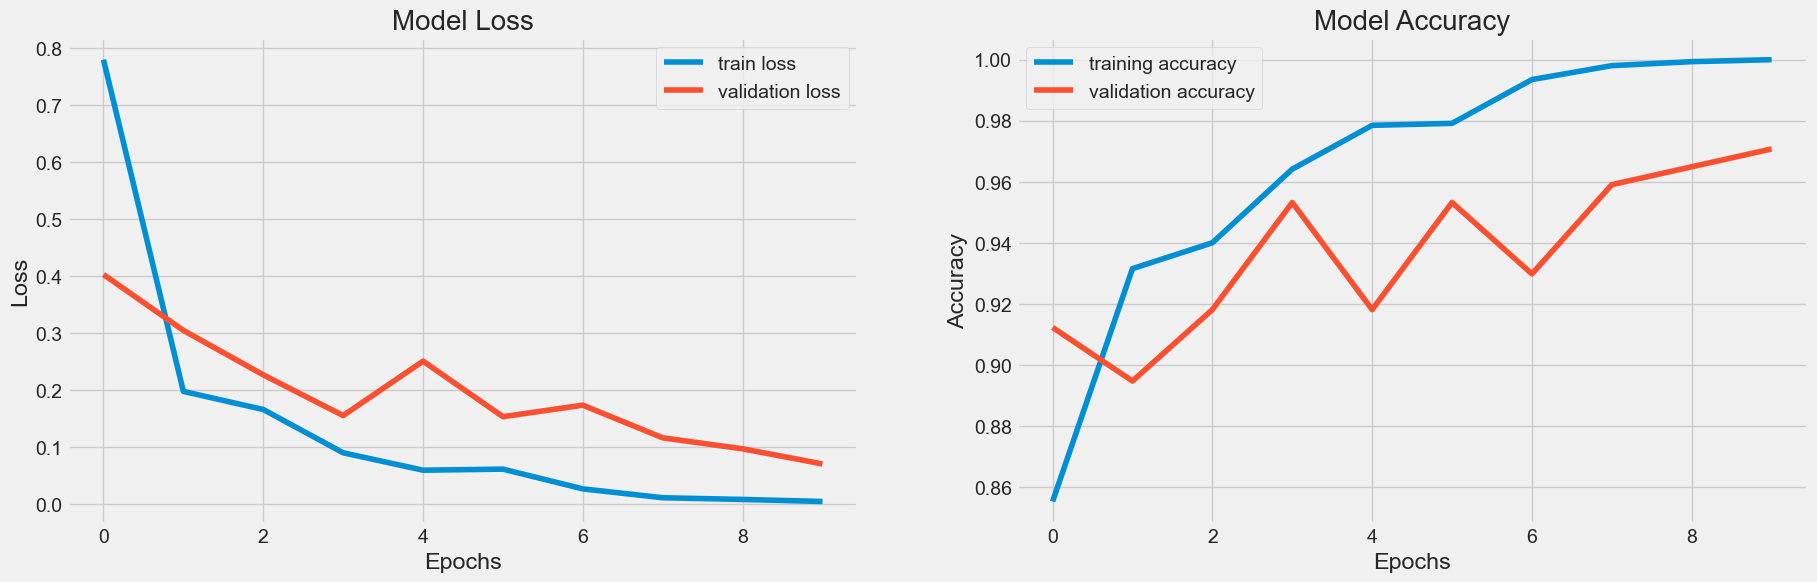

In [37]:
#Plotting Graph of Lstm model Training, Loss and Accuracy
plt.style.use("fivethirtyeight")
plt.figure(figsize = (20,6))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Model Loss",fontsize=20)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train loss', 'validation loss'], loc ='best')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Model Accuracy",fontsize=20)
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['training accuracy', 'validation accuracy'], loc ='best')
plt.show()

In [38]:
# Zapis modelu w formacie HDF5
lstmmodel.save('model.keras')

# Zapis skalera za pomocą pickle
import pickle
with open('scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [50]:
neg = data.loc[data["label"]=="NEGATIVE"]
sample_neg = neg.loc[0, :'fft_749_b']
print(sample_neg)

# Konwersja series do DataFrame (jeden wiersz)
sample_neg_df = sample_neg.to_frame().T

# Zapis do pliku CSV
sample_neg_df.to_csv('Data/Samples/new_sample_negative.csv', index=False)


# mean_0_a     4.62
mean_1_a       30.3
mean_2_a     -356.0
mean_3_a       15.6
mean_4_a       26.3
              ...  
fft_745_b    -215.0
fft_746_b     280.0
fft_747_b    -162.0
fft_748_b    -162.0
fft_749_b     280.0
Name: 0, Length: 2548, dtype: object


In [62]:
pos = data.loc[data["label"]=="POSITIVE"]
pos_reset = pos.reset_index(drop=True)
sample_pos = pos_reset.loc[0, :'fft_749_b']
print(sample_pos)

# Konwersja series do DataFrame (jeden wiersz)
sample_pos_df = sample_pos.to_frame().T

# Zapis do pliku CSV
sample_pos_df.to_csv('Data/Samples/new_sample_positive.csv', index=False)

# mean_0_a      8.9
mean_1_a       29.4
mean_2_a     -416.0
mean_3_a       16.7
mean_4_a       23.7
              ...  
fft_745_b    -267.0
fft_746_b     281.0
fft_747_b    -148.0
fft_748_b    -148.0
fft_749_b     281.0
Name: 0, Length: 2548, dtype: object


In [64]:
neu = data.loc[data["label"]=="NEUTRAL"]
neu_reset = neu.reset_index(drop=True)
sample_neu = neu_reset.loc[0, :'fft_749_b']
print(sample_neu)

# Konwersja series do DataFrame (jeden wiersz)
sample_neu_df = sample_neu.to_frame().T

# Zapis do pliku CSV
sample_neu_df.to_csv('Data/Samples/new_sample_neutral.csv', index=False)

# mean_0_a     28.8
mean_1_a       33.1
mean_2_a       32.0
mean_3_a       25.8
mean_4_a       22.8
              ...  
fft_745_b     182.0
fft_746_b      2.57
fft_747_b     -31.6
fft_748_b     -31.6
fft_749_b      2.57
Name: 0, Length: 2548, dtype: object


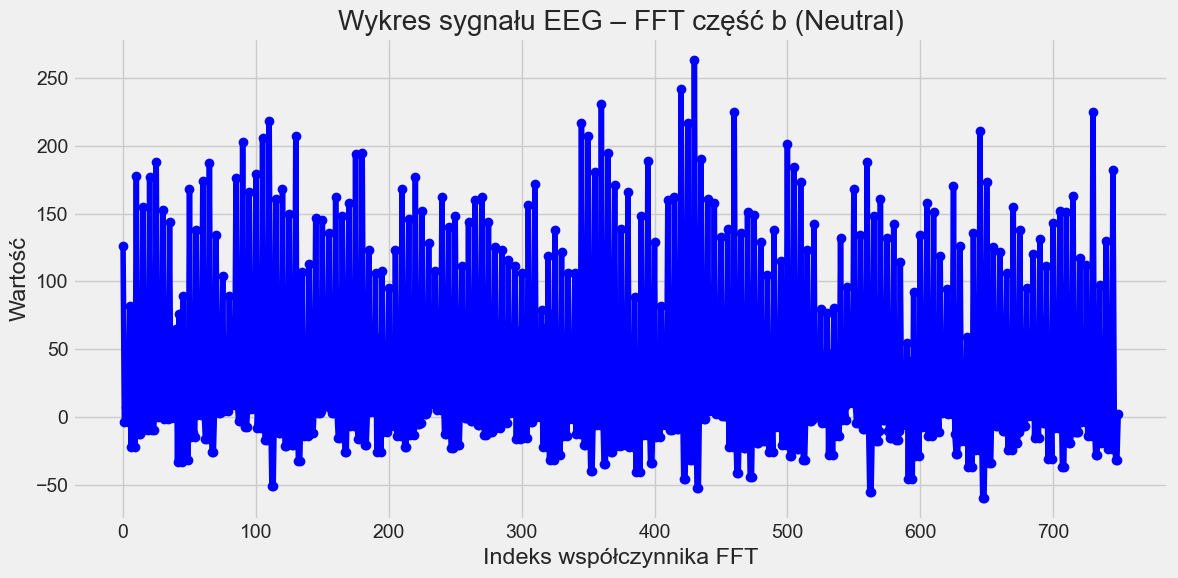